# 第2章 Python超高速入門

近年，Pythonには機械学習の各種手法のライブラリが充実し，頻繁に用いられる．  
そこで，ごく簡単にPythonとその数値計算ライブラリのNumpyの紹介を行う．

# Python基礎

## 変数と標準出力
よくあるプログラミング言語と同様に=を使って，右辺の値を左辺の変数に代入する．  
C言語のように変数宣言はない．  
行末に;（セミコロン）がいらない．  

In [76]:
a = 4
b = 5
total = a + b
print(total)

9


## リスト
Pythonには配列はない．  
代わりに，それよりも便利なリストがある．  
リストを配列のように使う．

In [105]:
a = [10, 11, 12, 13, 14]
print(a[0])
print(a[1])

10
11


リストにリストを格納することもできる．  
これで多次元配列を実現できる．

In [78]:
a = [[1,2,3], [4,5,6]]
print(a[0])
print(a[0][1])

[1, 2, 3]
2


## 繰り返し

繰り返しはwhileとforがある．

### while
まずwhileから説明する．大きな注意点が2つある．  
注意1. Pythonでびっくりするのが，while, if, 関数などのブロックを表すとき，{ } などの括弧ではなく，タブを使う．  
注意2. インクリメントはない．つまり，i++はできない．i=i+1 あるいは i += 1と記述する．

In [79]:
i=0
while i<3:
    print(i)
    i += 1

0
1
2


### for

forも繰り返しだが，whileと違って，listの中身を順番に取り出すために用いる．

基本的には以下のようになる．

In [9]:
a=[0,1,2]
for i in a:
    print(i)

0
1
2


range()と組み合わせると，whileと同じ動作をさせることができる．

注意： range(3)で[0,1,2]のリストを作る．これをひとつずつ取り出している．

In [10]:
for i in range(3):
    print(i)

0
1
2


つまり，以下のようなことも可能．（リストの中身を順番に取り出している）

In [80]:
a = [10, 11, 12, 13, 14]
for i in a:
    print(i)

10
11
12
13
14


## 条件分岐

一般的なif文と同様に用いる．

In [81]:
a = 2

if a==1:
    print("One")
elif a==2:
    print("Two")
else:
    print("Others")

Two


## 関数
次のように定義して用いる．
Pythonは，入力された変数によって挙動を変えるので，引数や戻り値に型の指定は不要である．

In [84]:
def func(x):
    y = x*2-8
    return y

num = 5
ans = func(num)
print(ans)

2


また，複数の戻り値を返すことができる．

In [85]:
def func(x):
    y = x*100
    z = x*2
    return y, z

num = 123
ans1, ans2 = func(num)
print(ans1, ans2)

12300 246


## 演習

- 問1． 1から10までを足してみよう． [解答](./program/chap2_1_1.py)
- 問2． 1から100までの内，3の倍数のみ足してみよう． [解答](./program/chap2_1_2.py)

# Numpy基礎

Numpyは数値計算ライブラリである．  
ベクトルや行列演算を行うときに用いる．  
また，連立一次方程式などのソルバーもある．

In [87]:
# numpyをインポートして名前をnpにする．numpyのメソッドは，np.***で使える．
import numpy as np

In [88]:
# 行列
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [89]:
# ベクトル
x = np.array([[1],[2],[3]])
print(x)

[[1]
 [2]
 [3]]


In [91]:
# 行列とベクトルの演算
b = np.dot(A, x)
print(b)

[[14]
 [32]
 [50]]


In [92]:
# こちらは違う
A * x

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])

In [93]:
#  定数倍
A * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [94]:
# 転値
A = np.array([[1,2],[3,4]])
print(A)
print(A.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


## 演習
次の行列A，Bが与えられているとき，行列C,Dを計算せよ．  

$$
A = 
\begin{pmatrix}
    2 & 0 & 4\\
    1 & 1 & -3
\end{pmatrix}
$$

$$
B = 
\begin{pmatrix}
    5 & 7 & 3\\
    2 & 0 & -1
\end{pmatrix}
$$

$$
C=2A+3B
$$

$$
D=A^T \times B
$$

[問3 解答](./program/chap2_2_1.py)  

## 連立1次方程式を解いてみる

次の連立一次方程式を解いてみよう．
$$
\begin{cases}
    x+5y=15\\
    -2x+y=-8
\end{cases}
$$

In [95]:
# 行列A
A = np.array([[1,5],[-2,1]])

# ベクトルb
b = np.array([[15],[-8]])

In [96]:
# 連立1次方程式Ax = bを解く
#
# 公式を使って逆行列を求めて，解を求める

invA = 1/(A[0,0]*A[1,1] - A[0,1]*A[1,0])*np.array([[A[1,1],-1*A[0,1]],[-1*A[1,0],A[0,0]]])
x = np.dot(invA, b)
print(x)

[[5.]
 [2.]]


2行2列の行列Aの逆行列は以下の公式で求められる．  
$$
A = 
\begin{pmatrix}
    a & b\\
    c & d
\end{pmatrix}
$$

$$
A^{-1}
=
\frac{1}{ad-bc}
\begin{pmatrix}
    d & -b\\
    -c & a
\end{pmatrix}
$$

In [97]:
# 連立1次方程式Ax = bを解く
#
# Numpyで逆行列を求めて，解を求める

invA = np.linalg.inv(A)
x = np.dot(invA, b)
print(x)

[[5.]
 [2.]]


In [98]:
# 連立1次方程式Ax = bを解く
#
# Numpyで連立1次方程式を解く

x = np.linalg.solve(A, b)
print(x)

[[5.]
 [2.]]


この連立一次方程式の係数を
$$
\begin{cases}
    x+5y=15\\
    -2x+y=-8
\end{cases}
$$
行列$A$，ベクトル$\boldsymbol{x}，\boldsymbol{b}$で表現すると

$$
A = 
\begin{pmatrix}
    1 & 5\\
    -2 & 1
\end{pmatrix}
$$

$$
\boldsymbol{x} = 
\begin{pmatrix}
    x\\
    y
\end{pmatrix}
$$

$$
\boldsymbol{b} = 
\begin{pmatrix}
    15\\
    -8
\end{pmatrix}
$$
となる．

したがって，上記の連立一次方程式は
$$
A\boldsymbol{x} = \boldsymbol{b}
$$
となる．

In [99]:
# 確認
np.dot(A,x)

array([[15.],
       [-8.]])

## 連立1次方程式を視覚化する（matplotlibの練習を兼ねて）

さきほどの連立一次方程式を考える．
$$
\begin{cases}
    x+5y=15\\
    -2x+y=-8
\end{cases}
$$

式変形すると2本の直線となる．  

$$
\begin{cases}
    y=-1/5x+3\\
    y=2x-8
\end{cases}
$$

つまり，連立一次方程式を解いて(x,y)を求めるのは2本の直線の交点を求めることになる．  
（ただし，2本の直線によっては，解が無数にある「不定」と，解が存在しない「不能」の場合がある）

In [100]:
# グラフ表示したい関数A
def mathfuncA(x):
    y = -1.0/5.0*x+3.0
    return y

In [101]:
# グラフ表示したい関数B
def mathfuncB(x):
    y = 2.0*x-8
    return y

In [102]:
mathfuncA(5)

2.0

In [103]:
mathfuncB(5)

2.0

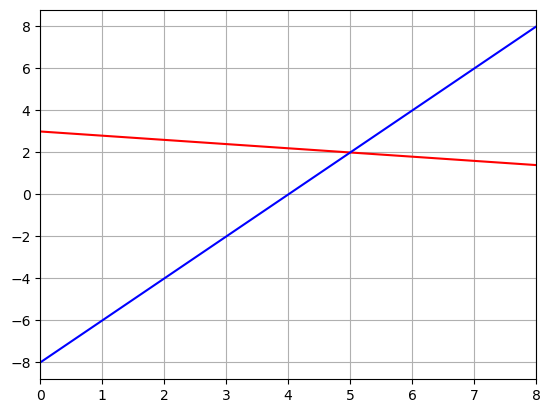

In [104]:
# 作成した関数のグラフを表示する
import matplotlib.pyplot as plt

# 定義域を設定
xmin = 0.0
xmax = 8.0
num = 100 # xminからxmaxまでをnum個で区切る
x = np.linspace(xmin, xmax, num)

# 関数から値域を取得
y = mathfuncA(x)
# 点どうしを直線でつなぐ
plt.plot(x, y,color='red')


# 関数から値域を取得
y = mathfuncB(x)
# 点どうしを直線でつなぐ
plt.plot(x, y,color='blue')

# 適切な表示範囲を指定
plt.xlim(xmin, xmax)

# グリッド追加
plt.grid(True)

# 表示
plt.show()

[講義資料に戻る](https://github.com/crotsu/Deep_Learning_Starting_with_Examples)

このページは[このリンク](https://colab.research.google.com/github/crotsu/Deep_Learning_Starting_with_Examples/blob/main/chap2_python/chap2_python.ipynb)よりgoogle colaboratoryで動作させることができる．  